# Module 4: Using the text classification model for traffic sentiment analysis 

Student: Svavar Hrafn Ágústsson

Date: 12. Sep 2023

### Importing and Cleaning the Data

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
lines = [
    'Four score and 7 years ago our fathers brought forth,',
    '... a new NATION, conceived in liberty $$$,',
    'and dedicated to the PrOpOsItIoN that all men are created equal',
    'One nation\'s freedom equals #freedom for another $nation!'
]

# Creat the CountVectorizer instance, the stop_words parameter is set to "english" to remove common English stop words like "and", "the", and "a"
vectorizer = CountVectorizer(stop_words='english')

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

# The get_feature_names_out method is used to get the feature names (i.e., the individual words) in the word matrix
feature_names = vectorizer.get_feature_names_out()

# The line_names list is created to store the names of each line in the original list of strings
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]

# A Pandas DataFrame is created using the word_matrix.toarray() method to convert the sparse matrix to a dense array
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,columns=feature_names)

# The head() method is called on the resulting DataFrame to display the first few rows of the matrix
df.head()

,ago,brought,conceived,created,dedicated,equal,equals,fathers,forth,freedom,liberty,men,nation,new,proposition,score,years
Line 1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
Line 2,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0
Line 3,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0
Line 4,0,0,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0


In [2]:
import re
# The preprocess_text function uses the re.sub() method from Python's regular expression library (re) to remove all digits from the text and convert it to lowercase.
def preprocess_text(text):
    return re.sub(r'\d+', '', text).lower()

# The word matrix is created using the same CountVectorizer instance and the additional preprocessor parameter set to preprocess_text
vectorizer = CountVectorizer(stop_words='english', preprocessor=preprocess_text)

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

## Exercise - part 4.1-Develop the text classification model for the traffic sentiment analysis

In [3]:
import pandas as pd
import os

# The path of the dataset
url = 'Pakistani Traffic sentiment Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


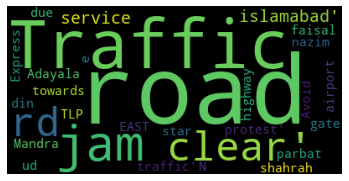

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [6]:
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

In [7]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Creat the CountVectorizer instance,the ngram_range represents the length range of phrase segmentation,the stop_words parameter is set to "english" to remove common English stop words like "and", "the", and "a" ,min_df is to serve as a threshold to delete some words.
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

# Convert the text to vectorizer
x = vectorizer.fit_transform(df['Text'])

# Obtain the label
y = df['Sentiment']

In [10]:
from sklearn.model_selection import train_test_split

# Splite the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression

# Creat the model, max_iter controls the maximum number of iterations, random_state provides a seed for the random number generator
model = LogisticRegression(max_iter=1000, random_state=0)

# Trains the logistic regression model using the training data.
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

The accuracy of the model is: 0.937799043062201


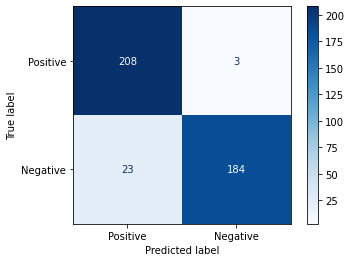

In [13]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score

# Show the results in a confusion matrix
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues')

# Calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

In [17]:
# Here you change the reviews
text = 'Adayala road has a road jam'

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

The prediction result of this review is: negative


## Exercise - part 4.2-Explore the performance of different text vectorization methods

CountVectorizer
The accuracy of the model is: 0.937799043062201


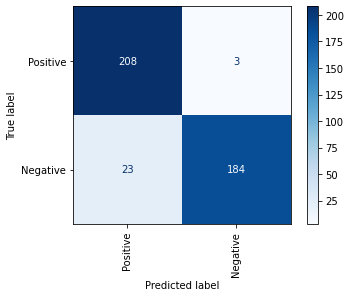

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import os

# here you can try use different vectorization methods 
#(Attention! uncomment the method you want to test, and comment out the other methods)

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)


#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test, display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print("CountVectorizer")
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

HashingVectorizer
The accuracy of the model is: 0.9545454545454546


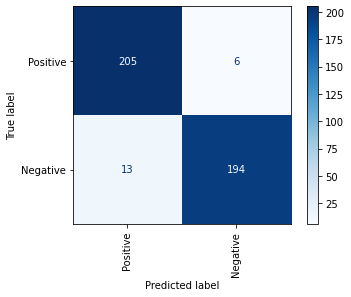

In [23]:
#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test, display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print("HashingVectorizer")
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

TfidfVectorizer
The accuracy of the model is: 0.9593301435406698


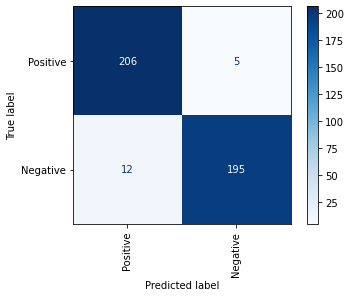

In [22]:
#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test, display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print("TfidfVectorizer")
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

## Exercise - part 4.3-Explore the performance of different text classification models

The accuracy of the model is: 0.9593301435406698
The accuracy of the model is: 0.916267942583732
The accuracy of the model is: 0.9665071770334929
The accuracy of the model is: 0.9665071770334929
The accuracy of the model is: 0.9593301435406698
The accuracy of the model is: 0.9449760765550239


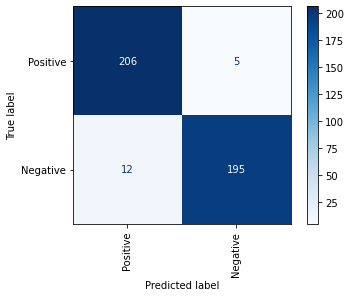

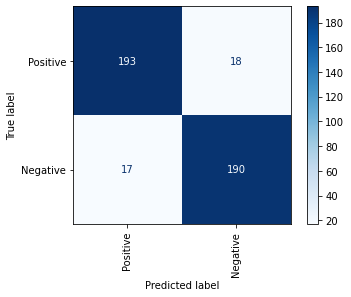

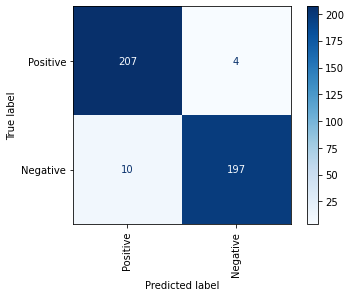

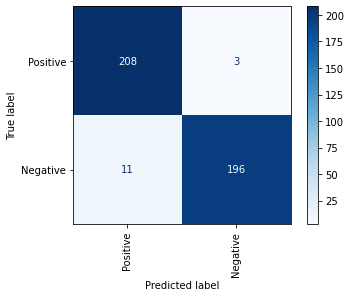

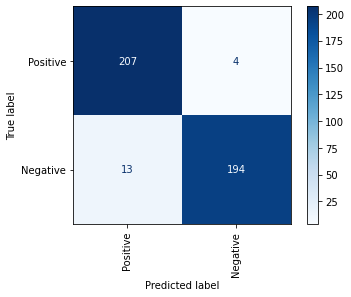

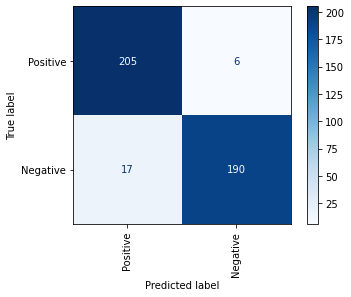

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# here you can try use different models (Attention! uncomment the method you want to test, and comment out the other methods)
#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

for i in range(1,7):
    if i == 1: #(1)LR
        model = LogisticRegression(max_iter=1000, random_state=0)
    elif i == 2: #(2)KNN
        model=KNeighborsClassifier()
    elif i == 3: #(3)RF
        model = RandomForestClassifier(random_state=0)
    elif i == 4: #(4)XGBoost
        model =  XGBClassifier()
    elif i == 5: #(5)SVM
        model= SVC(kernel="linear")
    else:        #(6)Naïve Bayes models
        model=BernoulliNB()
#-*-*-*-*-*-*chose different models-*-*-*-*-*-*
    model.fit(x_train, y_train)
    cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

    #calculate accuracy
    print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Exercise - Assignment task-Find the best text classification model for the sentimental analysis (assignment submission)

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV

1
1 1
{'C': 1}
Accuracy: 0.9378
1 2
{'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.9593
1 3
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.9689
1 4
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.9593
1 5
{'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9593
1 6
{'alpha': 1}
Accuracy: 0.9498
2 1
{'C': 10}
Accuracy: 0.9522
2 2
{'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.9498
2 3
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.9713
2 4
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.9737
2 5
{'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9713
2 6
{'alpha': 1}
Accuracy: 0.8349
3 1
{'C': 0.1}
Accuracy: 0.9569
3 2
{'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.9306
3 3
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.9689
3 4
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


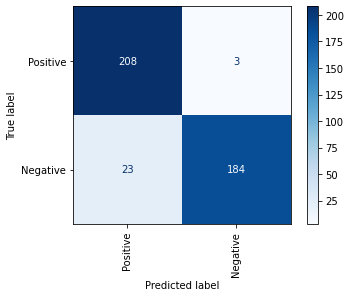

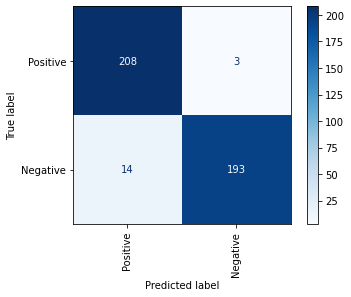

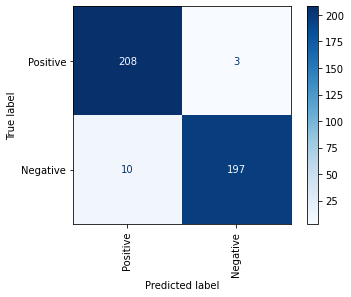

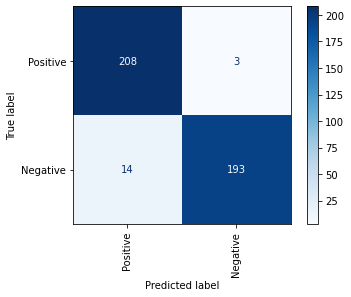

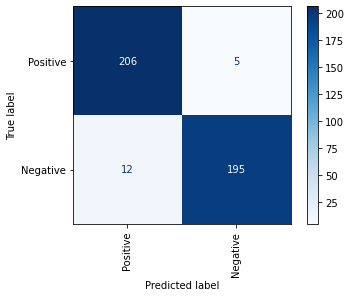

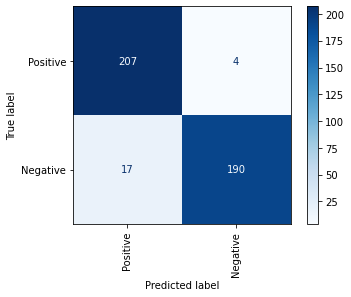

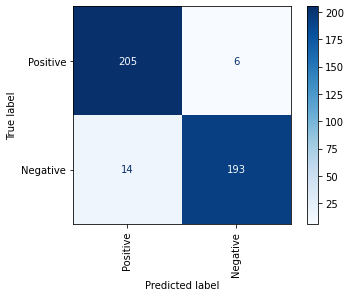

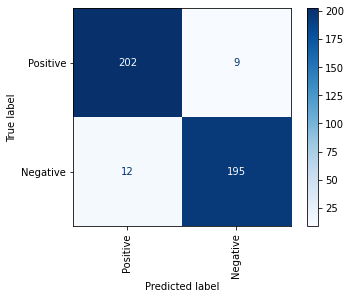

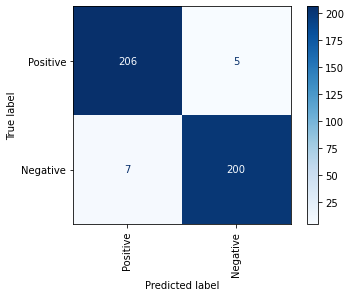

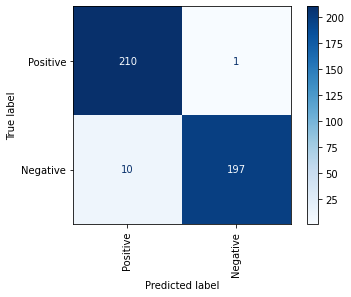

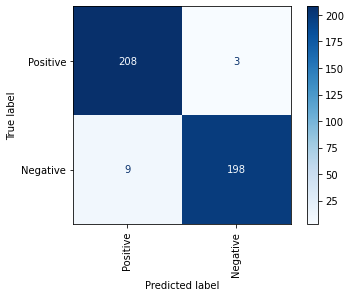

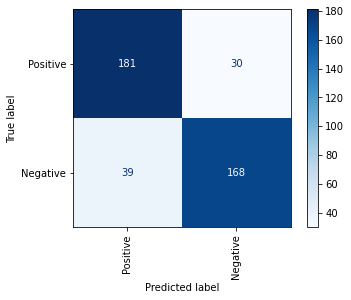

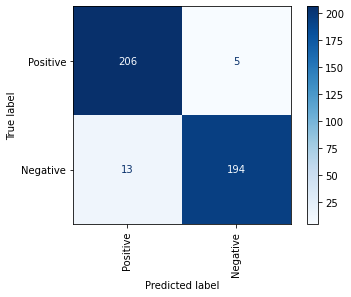

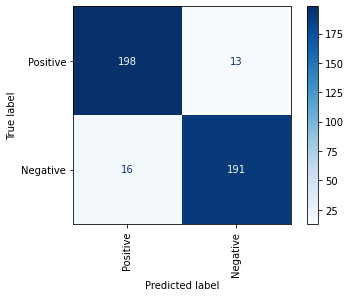

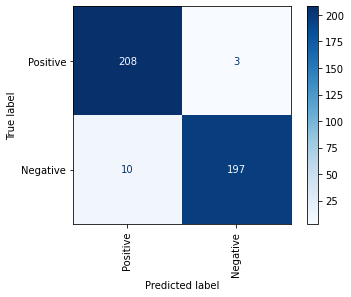

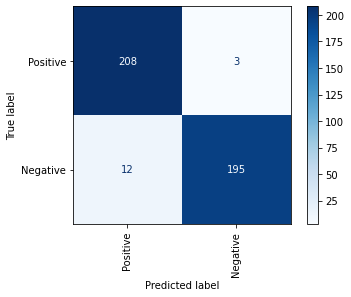

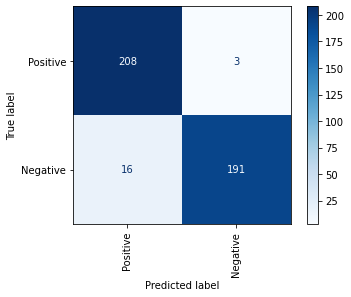

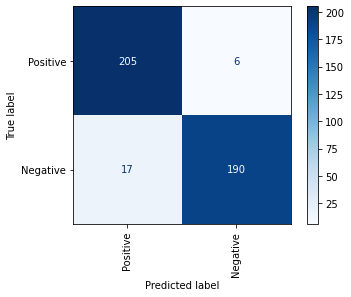

In [59]:
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
for i in range(1,4):
    if i == 1:#(1) CountVectorizer
        print(1)
        vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

    elif i == 2: #(2) HashingVectorizer
        vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

    else:#(3)TfidfVectorizer
        vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
    
    x = vectorizer.fit_transform(df['Text'])
    y = df['Sentiment']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# here you can try use the grid search to find the best model parameter(a example is in SVM model)
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

    for k in range(1,7):
        if k == 1: #(1)LR
            model = LogisticRegression(max_iter=1000, random_state=0)
            param_grid = {
                        'C': [0.001, 0.01, 0.1, 1, 10, 100],
            }
        elif k == 2: #(2)KNN
            model=KNeighborsClassifier()
            param_grid = {
                            'n_neighbors': [3, 5, 7, 9],
                            'weights': ['uniform', 'distance']
            }

        elif k == 3: #(3)RF
            model = RandomForestClassifier(random_state=0)
            param_grid = {
                        'n_estimators': [100, 200, 300],
                        'max_depth': [None, 10, 20, 30],
                        'min_samples_split': [2, 5, 10],
                        'min_samples_leaf': [1, 2, 4]
            }
        elif k == 4: #(4)XGBoost
            model =  XGBClassifier()
            param_grid = {
                         'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300],
                         'max_depth': [3, 4, 5]
            }


        elif k == 5: #(5)SVM
            model= SVC(probability=True)

#this is an example to use the grid search to find the best parameter for SVM model
#param_grid` specifies the hyperparameter grid to search over： kernel types ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
            param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}



        elif k == 6: #(6)Naïve Bayes models
            model=BernoulliNB()
            param_grid = {'alpha': [0.1, 0.5, 1]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
        grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
        best_params = grid_search.best_params_
        print(i,k)
        print(best_params)
        best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
        model = grid_search.best_estimator_
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

        cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
        print('Accuracy: '+str(("%.4f" %accuracy_score(y_test,model.predict(x_test)))))